In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [3]:
data_ads = pd.read_csv("../datasets/ads/Advertising.csv")
data_ads.head()

,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [4]:
len(data_ads) # cantidad de filas (en este caso serían días)

200

In [5]:
data_ads["corrn"] = (data_ads["TV"] - np.mean(data_ads["TV"])) * (data_ads["Sales"] - np.mean(data_ads["Sales"]))
#correlación tv. Solo el numerador

In [6]:
data_ads["corr1"] = (data_ads["TV"] - np.mean(data_ads["TV"])) **2

In [7]:
data_ads["corr2"] = (data_ads["Sales"] - np.mean(data_ads["Sales"]))**2

In [8]:
data_ads.head()

,TV,Radio,Newspaper,Sales,corrn,corr1,corr2
0,230.1,37.8,69.2,22.1,670.896956,6898.548306,65.246006
1,44.5,39.3,45.1,10.4,371.460206,10514.964306,13.122506
2,17.2,45.9,69.3,9.3,613.181206,16859.074806,22.302006
3,151.5,41.3,58.5,18.5,19.958456,19.869306,20.048006
4,180.8,10.8,58.4,12.9,-37.892794,1139.568806,1.260006


In [9]:
corr_pearson = sum(data_ads["corrn"]) / np.sqrt(sum(data_ads["corr1"]) * sum(data_ads["corr2"]))
corr_pearson

0.782224424861606

In [10]:
def corr_coef(df, var1, var2):
    df["corrn"] = (df[var1] - np.mean(df[var1])) * (df[var2] - np.mean(df[var2]))
    data_ads["corr1"] = (df[var1] - np.mean(df[var1])) **2
    data_ads["corr2"] = (df[var2] - np.mean(df[var2])) **2
    corr_pearson = sum(df["corrn"]) / np.sqrt(sum(df["corr1"]) * sum(df["corr2"]))
    return corr_pearson

In [11]:
corr_coef(data_ads, "TV", "Sales")

0.782224424861606

In [12]:
# Vuelvo a hacer la carga (para no contar las cols que agregué antes)
data_ads = pd.read_csv("../datasets/ads/Advertising.csv") 

In [13]:
cols = data_ads.columns.values

In [14]:
y = "Sales"
for x in cols:
    print(x + ", " + y + " : " + str(corr_coef(data_ads, x, y)))

TV, Sales : 0.782224424861606
Radio, Sales : 0.576222574571055
Newspaper, Sales : 0.22829902637616534
Sales, Sales : 1.0


Text(0.5, 1.0, 'Gasto en TV vs Ventas del producto')

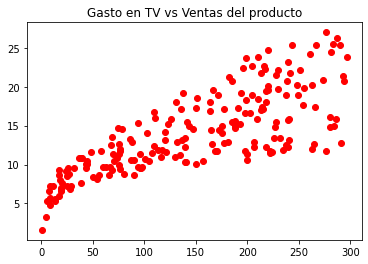

In [15]:
plt.plot(data_ads["TV"], data_ads["Sales"], "ro")
plt.title("Gasto en TV vs Ventas del producto")

Text(0.5, 1.0, 'Gasto en Radio vs Ventas del producto')

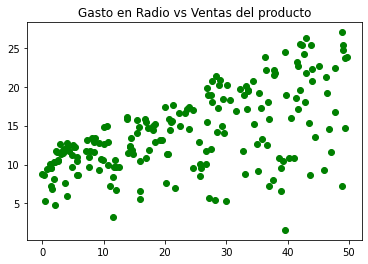

In [16]:
plt.plot(data_ads["Radio"], data_ads["Sales"], "go")
plt.title("Gasto en Radio vs Ventas del producto")

Text(0.5, 1.0, 'Gasto en Newspaper vs Ventas del producto')

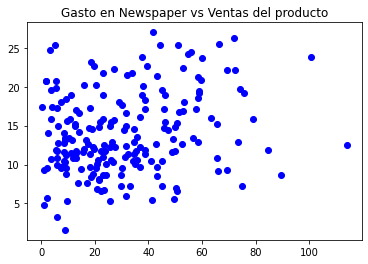

In [17]:
plt.plot(data_ads["Newspaper"], data_ads["Sales"], "bo")
plt.title("Gasto en Newspaper vs Ventas del producto")

# De manera automática con PANDAS

In [21]:
data_ads = pd.read_csv("../datasets/ads/Advertising.csv")

In [22]:
data_ads.corr()

,TV,Radio,Newspaper,Sales
TV,1.000000,0.054809,0.056648,0.782224
Radio,0.054809,1.000000,0.354104,0.576223
Newspaper,0.056648,0.354104,1.000000,0.228299
Sales,0.782224,0.576223,0.228299,1.000000


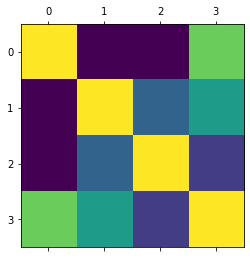

In [23]:
plt.matshow(data_ads.corr(), )

Hacer la matriz de correlación más bonita

In [24]:
cols = ['TV', 'Radio', 'Newspaper', 'Sales']

C:\Users\user\AppData\Local\Temp\ipykernel_14020\1228375734.py:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes.set_xticklabels([""] + cols)
C:\Users\user\AppData\Local\Temp\ipykernel_14020\1228375734.py:9: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes.set_yticklabels([""] + cols)


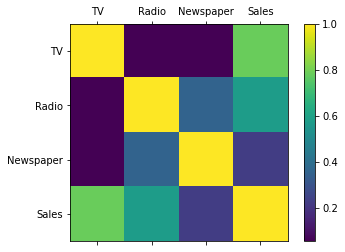

In [27]:
figure = plt.figure()
axes = figure.add_subplot(111)
 
# using the matshow() function
caxes = axes.matshow(data_ads.corr(), interpolation ='nearest')
figure.colorbar(caxes)
 
axes.set_xticklabels([""] + cols)
axes.set_yticklabels([""] + cols)
 
plt.show()